In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
import math as m




%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 4000
pd.set_option('display.max_colwidth', -1)

c:\python27\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\python27\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\python27\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\python27\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\python27\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  f

In [2]:
def corr_salePrice(attribute):
    data.groupby(attribute)['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', figsize = (20, 10))

In [3]:
data = pd.read_csv("train.csv")
target = data['SalePrice']
test = pd.read_csv("test.csv")
data.drop(['Id'], axis = 1, inplace = True)
testIds = test['Id']
test.drop(['Id'], axis = 1, inplace = True)

In [4]:
data.dtypes
data.shape

MSSubClass       int64  
MSZoning         object 
LotFrontage      float64
LotArea          int64  
Street           object 
Alley            object 
LotShape         object 
LandContour      object 
Utilities        object 
LotConfig        object 
LandSlope        object 
Neighborhood     object 
Condition1       object 
Condition2       object 
BldgType         object 
HouseStyle       object 
OverallQual      int64  
OverallCond      int64  
YearBuilt        int64  
YearRemodAdd     int64  
RoofStyle        object 
RoofMatl         object 
Exterior1st      object 
Exterior2nd      object 
MasVnrType       object 
MasVnrArea       float64
ExterQual        object 
ExterCond        object 
Foundation       object 
BsmtQual         object 
BsmtCond         object 
BsmtExposure     object 
BsmtFinType1     object 
BsmtFinSF1       int64  
BsmtFinType2     object 
BsmtFinSF2       int64  
BsmtUnfSF        int64  
TotalBsmtSF      int64  
Heating          object 
HeatingQC        object 


(1460, 80)

### Drop columns that are missing at least than 25% of their values

In [5]:
data.isna().mean().sort_values(ascending=False)
test.isna().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageYrBlt      0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
RoofMatl         0.000000
Exterior1st      0.000000
RoofStyle        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
YearBuilt        0.000000
ExterCond        0.000000
Foundation       0.000000
YearRemodAdd     0.000000
SalePrice        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities   

PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
LotFrontage      0.155586
GarageCond       0.053461
GarageFinish     0.053461
GarageYrBlt      0.053461
GarageQual       0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtExposure     0.030158
BsmtQual         0.030158
BsmtFinType1     0.028787
BsmtFinType2     0.028787
MasVnrType       0.010966
MasVnrArea       0.010281
MSZoning         0.002742
BsmtHalfBath     0.001371
Utilities        0.001371
Functional       0.001371
BsmtFullBath     0.001371
BsmtFinSF2       0.000685
BsmtFinSF1       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
Exterior2nd      0.000685
SaleType         0.000685
Exterior1st      0.000685
KitchenQual      0.000685
GarageArea       0.000685
GarageCars       0.000685
OverallQual      0.000000
Neighborhood     0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour 

In [6]:
# data.isna().mean().sort_values(ascending=False)
cols = [col for col in data.isna().mean() >= .25]
data.columns[cols]

# drop the same columns in test dataset
colNames = []
for col in data.columns[cols]:
    colNames.append(col)
    
data.drop(columns = data.columns[cols], axis = 1, inplace = True)


# test.columns[cols]

test.drop(columns = colNames, axis = 1, inplace = True)

data.shape
test.shape


Index([u'Alley', u'FireplaceQu', u'PoolQC', u'Fence', u'MiscFeature'], dtype='object')

(1460, 75)

(1459, 74)

### Constant variables

In [7]:
# selector = VarianceThreshold(threshold=0.05)
# selector.fit(data)
# data.columns[selector.get_support()]

# cols = [col for col in data.isnull().mean() > 0]
# for col in data.columns[cols]:
for col in data.columns:
    
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        if data[col].std() == 0:
            col
            data[col].std()
    else:
        if len(data[col].unique()) == 1:
            col
            data[col].unique()

### Quasi constant variables

In [8]:
dfLength = float(len(data))
quasConst = []
for col in data.columns:
    dominating_val_pct = (data[col].value_counts()/ dfLength).sort_values(ascending=False).values[0]
    if dominating_val_pct > .95:
        col
        quasConst.append(col)
        
data.drop(inplace = True, columns = quasConst, axis = 1)
test.drop(inplace = True, columns = quasConst, axis = 1)
data.shape
test.shape

'Street'

'Utilities'

'Condition2'

'RoofMatl'

'Heating'

'LowQualFinSF'

'KitchenAbvGr'

'3SsnPorch'

'PoolArea'

'MiscVal'

(1460, 65)

(1459, 64)

In [9]:
data.LotFrontage = data.groupby(['PavedDrive', 'BldgType', 'Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.mean()))
test.LotFrontage = data.groupby(['PavedDrive', 'BldgType', 'Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.mean()))
# the above leaves some more null values
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)
test['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)

### Imputing categorical data

In [10]:
data['GarageQual'].fillna(data['KitchenQual'], inplace = True)
test['GarageQual'].fillna(test['KitchenQual'], inplace = True)

In [11]:


# data[data['GarageCond'].isnull()]
# data.groupby(['OverallCond'])['GarageCond'].value_counts().sort_values(ascending=False)
nullCols = []
colMasks = [col for col in data.isnull().mean() > 0]
for col in colMasks:
    nullCols.append(col)
cols = data.columns[nullCols]
for col in cols:
    data[col].fillna(data[col].mode()[0], inplace = True)

nullCols = []
colMasks = [col for col in test.isnull().mean() > 0]
for col in colMasks:
    nullCols.append(col)
cols = test.columns[nullCols]
for col in cols:
    test[col].fillna(test[col].mode()[0], inplace = True)



### Correlation

In [12]:
data.corr().abs().unstack()[(data.corr().abs().unstack() > .8) & (data.corr().abs().unstack() < 1)]
highCorrVars = ['GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea']
data.drop(inplace = True, columns = highCorrVars, axis = 1)
test.drop(inplace = True, columns = highCorrVars, axis = 1)
data.shape
test.shape

TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
dtype: float64

(1460, 61)

(1459, 60)

In [13]:
data.corr().abs().unstack()['LotFrontage']

MSSubClass       0.402373
LotFrontage      1.000000
LotArea          0.337904
OverallQual      0.227436
OverallCond      0.037687
YearBuilt        0.113525
YearRemodAdd     0.073844
MasVnrArea       0.176860
BsmtFinSF1       0.223633
BsmtFinSF2       0.049971
BsmtUnfSF        0.122486
1stFlrSF         0.429881
2ndFlrSF         0.084762
GrLivArea        0.389481
BsmtFullBath     0.096236
BsmtHalfBath     0.009346
FullBath         0.189723
HalfBath         0.066152
BedroomAbvGr     0.267617
Fireplaces       0.255323
GarageCars       0.270558
WoodDeckSF       0.094115
OpenPorchSF      0.144117
EnclosedPorch    0.005709
ScreenPorch      0.039641
MoSold           0.014807
YrSold           0.003339
SalePrice        0.347110
dtype: float64

### Categorical Encoding

In [14]:
data['YearBuilt'].describe()
data['YearBuilt'].unique()
data['YearBuilt'] = data['YearBuilt'].round(-1)
test['YearBuilt'] = test['YearBuilt'].round(-1)
data['YearBuilt'].describe()
data['YearBuilt'].unique()

data['YrSold'] = data['YrSold'].round(-1)
test['YrSold'] = test['YrSold'].round(-1)




count    1460.000000
mean     1971.267808
std      30.202904  
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

count    1460.000000
mean     1971.315068
std      30.270373  
min      1870.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

array([2000, 1980, 1920, 1990, 1970, 1930, 1940, 1960, 2010, 1950, 1910,
       1880, 1890, 1900, 1870], dtype=int64)

In [15]:
data['MoSold'].unique()
seasonMap = { 12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall',11:'Fall'}

data['MoSold'] = data['MoSold'].map(seasonMap)
test['MoSold'] = test['MoSold'].map(seasonMap)

data['MoSold'].unique()
data['MoSold'].describe()


array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

array(['Winter', 'Spring', 'Fall', 'Summer'], dtype=object)

count     1460  
unique    4     
top       Summer
freq      609   
Name: MoSold, dtype: object

In [16]:

data = data.astype({"MSSubClass": object, "YearBuilt": object, "YearRemodAdd": object, "MoSold": object, "YrSold": object, "OverallQual": object, "OverallCond": object})
test = test.astype({"MSSubClass": object, "YearBuilt": object, "YearRemodAdd": object, "MoSold": object, "YrSold": object, "OverallQual": object, "OverallCond": object})
data.dtypes

MSSubClass       object 
MSZoning         object 
LotFrontage      float64
LotArea          int64  
LotShape         object 
LandContour      object 
LotConfig        object 
LandSlope        object 
Neighborhood     object 
Condition1       object 
BldgType         object 
HouseStyle       object 
OverallQual      object 
OverallCond      object 
YearBuilt        object 
YearRemodAdd     object 
RoofStyle        object 
Exterior1st      object 
Exterior2nd      object 
MasVnrType       object 
MasVnrArea       float64
ExterQual        object 
ExterCond        object 
Foundation       object 
BsmtQual         object 
BsmtCond         object 
BsmtExposure     object 
BsmtFinType1     object 
BsmtFinSF1       int64  
BsmtFinType2     object 
BsmtFinSF2       int64  
BsmtUnfSF        int64  
HeatingQC        object 
CentralAir       object 
Electrical       object 
1stFlrSF         int64  
2ndFlrSF         int64  
GrLivArea        int64  
BsmtFullBath     int64  
BsmtHalfBath     int64  


### Bucket Neighborhoods into rich, average, cheap, poor

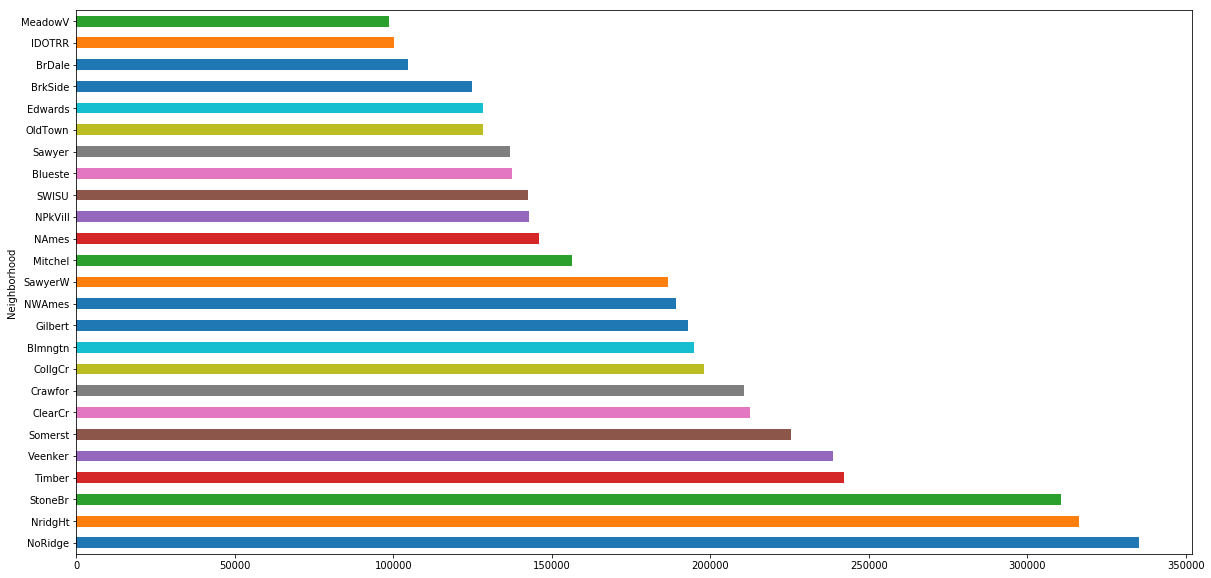

In [17]:
# data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending=False).plot(kind='barh', figsize = (20, 10))
corr_salePrice(['Neighborhood'])

In [18]:
difference = list(set(data['Neighborhood'].unique()) - set(test['Neighborhood'].unique()))
print ("Difference in neighborhoods between training and test sets: " , difference)



data['Neighborhood'].value_counts().sort_index(ascending=False)
neighborhoodMap = {}
for expN in ['NoRidge','NridgHt','StoneBr']:
    neighborhoodMap[expN] = 'ExpensiveN'
for avgN in ['Timber','Veenker','Somerst','ClearCr','Crawfor','CollgCr','Blmngtn','Gilbert','NWAmes','SawyerW']:
    neighborhoodMap[avgN] = 'AverageN'
for cheapN in ['Mitchel','NAmes','NPkVill','SWISU','Blueste','Sawyer','OldTown','Edwards','BrkSide']:
    neighborhoodMap[cheapN] = 'CheapN'
for poorN in ['BrDale','IDOTRR','MeadowV']:
    neighborhoodMap[poorN] = 'PoorN'
    
data['Neighborhood'] = data['Neighborhood'].map(neighborhoodMap)
test['Neighborhood'] = test['Neighborhood'].map(neighborhoodMap)

data['Neighborhood'].value_counts().sort_index(ascending=False)


Difference in neighborhoods between training and test sets:  []


Veenker    11 
Timber     38 
StoneBr    25 
Somerst    86 
SawyerW    59 
Sawyer     74 
SWISU      25 
OldTown    113
NridgHt    77 
NoRidge    41 
NWAmes     73 
NPkVill    9  
NAmes      225
Mitchel    49 
MeadowV    17 
IDOTRR     37 
Gilbert    79 
Edwards    100
Crawfor    51 
CollgCr    150
ClearCr    28 
BrkSide    58 
BrDale     16 
Blueste    2  
Blmngtn    17 
Name: Neighborhood, dtype: int64

PoorN         70 
ExpensiveN    143
CheapN        655
AverageN      592
Name: Neighborhood, dtype: int64

### Bucket conditions into Normal, near railroad and other

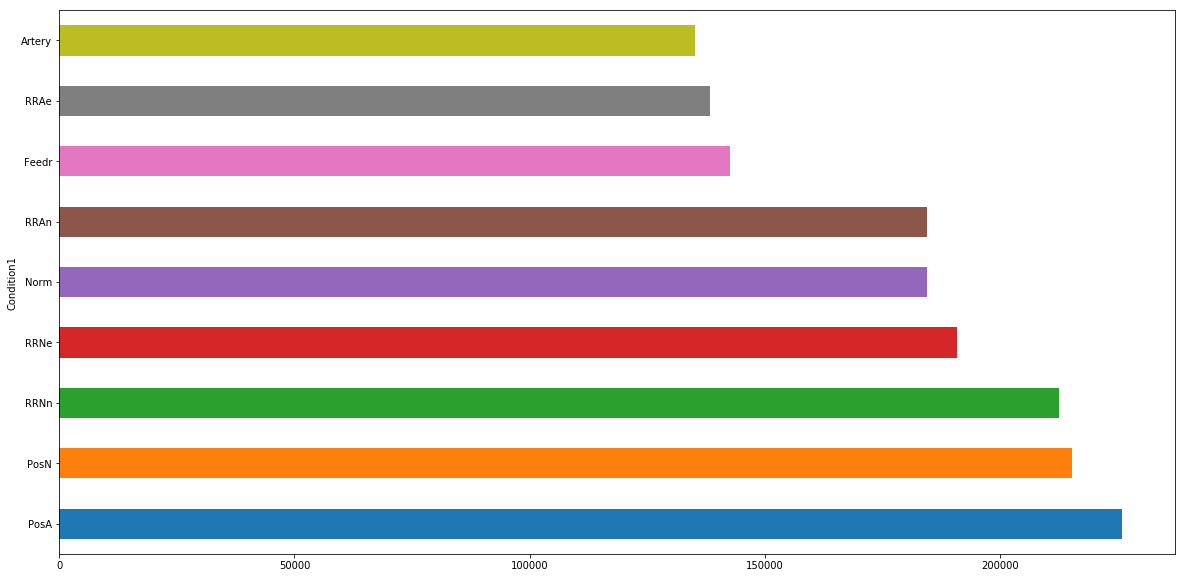

In [19]:
corr_salePrice(['Condition1'])

In [20]:
difference = list(set(data['Condition1'].unique()) - set(test['Condition1'].unique()))
print ("Difference in Condition1 between training and test sets: " , difference)

data['Condition1'].value_counts().sort_index(ascending=False)

conditionMap = {}
for rrn in ['RRNn','RRNe','RRAn', 'RRAe']:
    conditionMap[rrn] = 'railroad'
for norm in ['Norm']:
    conditionMap[norm] = 'normal'
for other in ['PosN','PosA','Feedr', 'Artery']:
    conditionMap[other] = 'other'
    
data['Condition1'] = data['Condition1'].map(conditionMap)
test['Condition1'] = test['Condition1'].map(conditionMap)

data['Condition1'].value_counts().sort_index(ascending=False)

Difference in Condition1 between training and test sets:  []


RRNn      5   
RRNe      2   
RRAn      26  
RRAe      11  
PosN      19  
PosA      8   
Norm      1260
Feedr     81  
Artery    48  
Name: Condition1, dtype: int64

railroad    44  
other       156 
normal      1260
Name: Condition1, dtype: int64

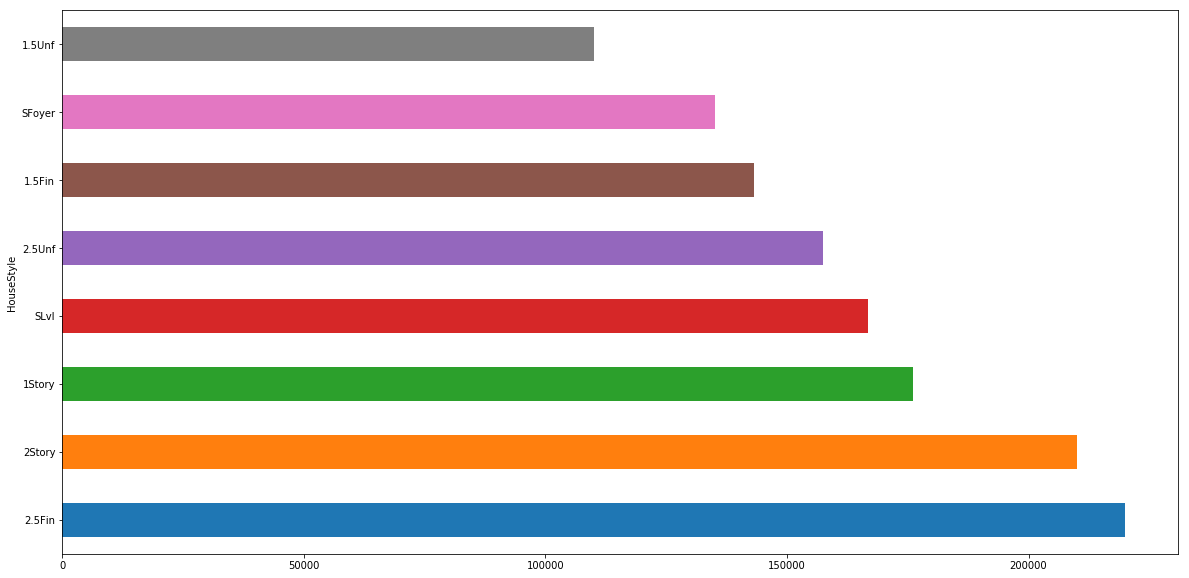

In [21]:
corr_salePrice(['HouseStyle'])

Difference in LotShape between training and test sets:  []


IR3    10 
IR2    41 
IR1    484
Reg    925
Name: LotShape, dtype: int64

regular      925
irregular    535
Name: LotShape, dtype: int64

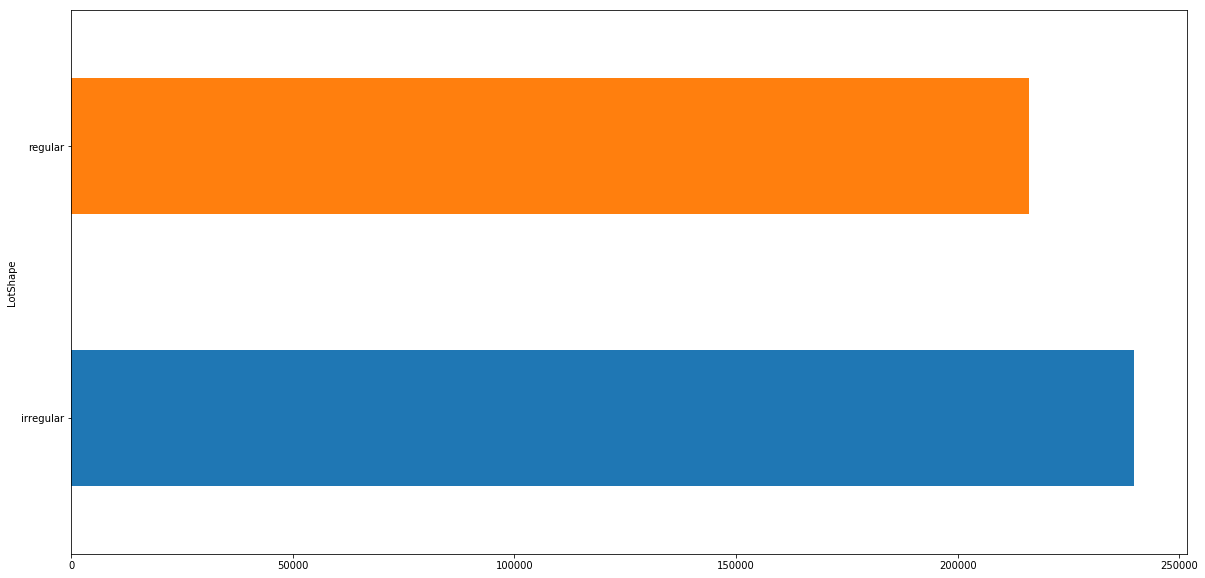

In [22]:
difference = list(set(data['LotShape'].unique()) - set(test['LotShape'].unique()))
print ("Difference in LotShape between training and test sets: " , difference)


# data.dtypes
data['LotShape'].value_counts().sort_values()

corr_salePrice(['LotShape'])
lotMap = {}
for irreg in ['IR1','IR2','IR3']:
    lotMap[irreg] = 'irregular'
for reg in ['Reg']:
    lotMap[reg] = 'regular'
    
data['LotShape'] = data['LotShape'].map(lotMap)
test['LotShape'] = test['LotShape'].map(lotMap)

data['LotShape'].value_counts().sort_index(ascending=False)
corr_salePrice(['LotShape'])


Difference in LotConfig between training and test sets:  []


FR3        4   
FR2        47  
CulDSac    94  
Corner     263 
Inside     1052
Name: LotConfig, dtype: int64

sideFrontage    51  
Inside          1052
CulDSac         94  
Corner          263 
Name: LotConfig, dtype: int64

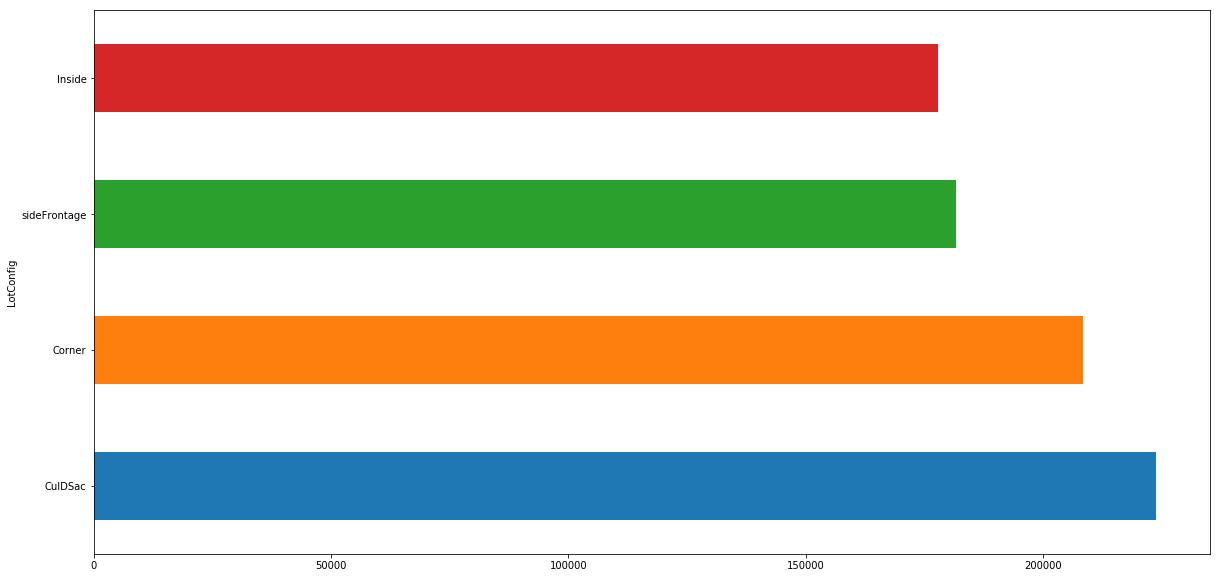

In [23]:
difference = list(set(data['LotConfig'].unique()) - set(test['LotConfig'].unique()))
print ("Difference in LotConfig between training and test sets: " , difference)

data['LotConfig'].value_counts().sort_values()

corr_salePrice(['LotConfig'])

configMap = {}
for irreg in ['FR2','FR3']:
    configMap[irreg] = 'sideFrontage'
for reg in ['Inside','Corner', 'CulDSac']:
    configMap[reg] = reg
    
data['LotConfig'] = data['LotConfig'].map(configMap)
test['LotConfig'] = test['LotConfig'].map(configMap)

data['LotConfig'].value_counts().sort_index(ascending=False)
corr_salePrice(['LotConfig'])

1     2  
2     3  
10    18 
3     20 
9     43 
4     116
8     168
7     319
6     374
5     397
Name: OverallQual, dtype: int64

1    1  
2    5  
9    22 
3    25 
4    57 
8    72 
7    205
6    252
5    821
Name: OverallCond, dtype: int64

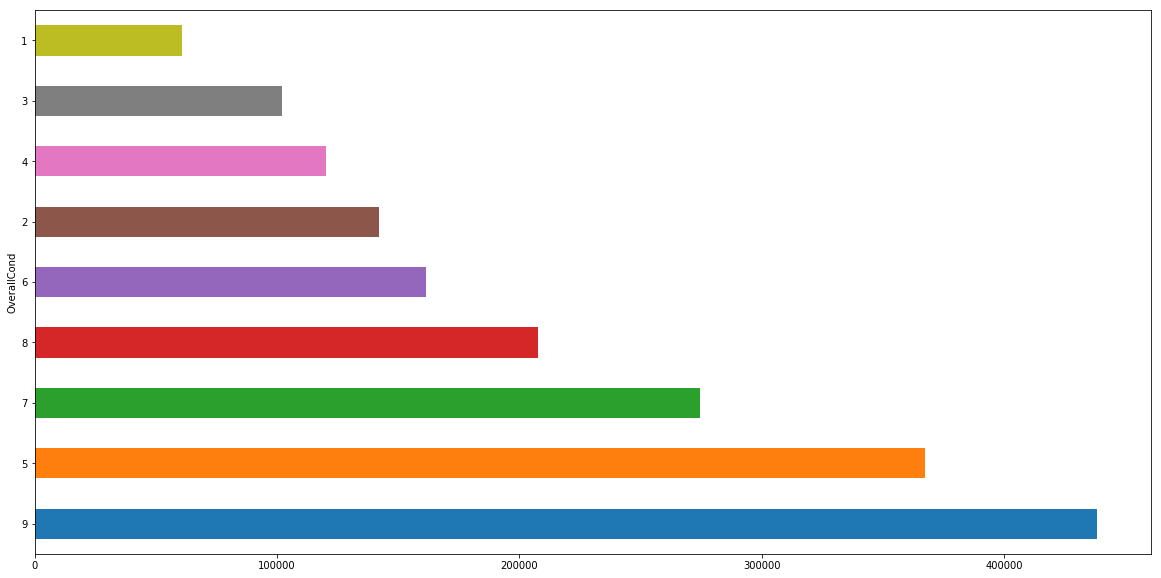

In [24]:
data['OverallQual'].value_counts().sort_values()
corr_salePrice(['OverallQual'])
data['OverallCond'].value_counts().sort_values()
corr_salePrice(['OverallCond'])

### To do - more bucketing?

### Standardizing continuous columns - ?

In [25]:
data.drop(['SalePrice'], axis = 1, inplace = True)
data.shape
test.shape

(1460, 60)

(1459, 60)

In [26]:
data.dtypes
from sklearn.preprocessing import StandardScaler
numCols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
scaler = StandardScaler()
data[numCols] = scaler.fit_transform(data[numCols])
test[numCols] = scaler.fit_transform(test[numCols])

data[numCols].head()
test[numCols].head()

MSSubClass       object 
MSZoning         object 
LotFrontage      float64
LotArea          int64  
LotShape         object 
LandContour      object 
LotConfig        object 
LandSlope        object 
Neighborhood     object 
Condition1       object 
BldgType         object 
HouseStyle       object 
OverallQual      object 
OverallCond      object 
YearBuilt        object 
YearRemodAdd     object 
RoofStyle        object 
Exterior1st      object 
Exterior2nd      object 
MasVnrType       object 
MasVnrArea       float64
ExterQual        object 
ExterCond        object 
Foundation       object 
BsmtQual         object 
BsmtCond         object 
BsmtExposure     object 
BsmtFinType1     object 
BsmtFinSF1       int64  
BsmtFinType2     object 
BsmtFinSF2       int64  
BsmtUnfSF        int64  
HeatingQC        object 
CentralAir       object 
Electrical       object 
1stFlrSF         int64  
2ndFlrSF         int64  
GrLivArea        int64  
BsmtFullBath     int64  
BsmtHalfBath     int64  


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-0.241525,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.793434,1.161852,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.951226,0.311725,-0.752176,0.216503,-0.359325,-0.270208
1,0.418140,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.257140,-0.795163,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,0.600495,0.311725,1.626195,-0.704483,-0.359325,-0.270208
2,-0.109592,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.627826,1.189351,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,0.600495,0.311725,-0.752176,-0.070361,-0.359325,-0.270208
3,-0.461413,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.521734,0.937276,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,0.600495,1.650307,-0.752176,-0.176048,4.092524,-0.270208
4,0.594051,0.375148,1.366489,0.463568,-0.288653,-0.174865,-0.045611,1.617877,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,0.600495,1.650307,0.780197,0.563760,-0.359325,-0.270208


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-0.241310,0.363929,-0.563316,0.063936,0.517537,-0.649392,-0.654561,-0.775254,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.898055,-0.988189,0.366678,-0.701628,-0.360738,1.818960
1,0.418139,0.897861,0.047057,1.063714,-0.297689,-0.338322,0.433298,-0.775254,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.898055,-0.988189,2.347867,-0.178826,-0.360738,-0.301543
2,-0.109420,0.809646,-0.563316,0.773668,-0.297689,-0.953599,-0.574165,0.891944,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,0.647066,0.301406,0.930495,-0.207871,-0.360738,-0.301543
3,-0.461126,0.032064,-0.450284,0.358376,-0.297689,-0.525879,-0.579190,0.837243,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,0.647066,0.301406,2.089451,-0.178826,-0.360738,-0.301543
4,0.593991,-0.971808,-0.563316,-0.386513,-0.297689,1.059203,0.310192,-0.775254,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.898055,0.301406,-0.729632,0.489198,-0.360738,2.243060


In [27]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [28]:
data.shape
test.shape

difference = list(set(data.columns) - set(test.columns))
print ("Difference between training and test sets: " , difference)
data.drop(inplace = True, columns = difference, axis = 1)

difference = list(set(test.columns) - set(data.columns))
print ("Difference between test and training sets: " , difference)
test.drop(inplace = True, columns = difference, axis = 1)

data.shape
test.shape

(1460, 313)

(1459, 308)

Difference between training and test sets:  ['Exterior2nd_Other', 'YearBuilt_1870', 'Exterior1st_Stone', 'HouseStyle_2.5Fin', 'Electrical_Mix', 'Exterior1st_ImStucc']
Difference between test and training sets:  ['MSSubClass_150']


(1460, 307)

(1459, 307)

In [29]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
import itertools as it
from sklearn.decomposition import PCA

c:\python27\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
# # Split the dataset in two equal parts into 80:20 ratio for train:test
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0)

In [ ]:
num_components = [80, 100, 150, 200, 250, 300]

paramDict = {}
modelDict = {}

tuned_parameters_Bayes = [{'n_iter':[200, 500, 1000] , 'tol' : [1e-3, 1e-4, 5e-3], 'alpha_1':[1e-6, 1e-7, 5e-6], 'alpha_2':[1e-6, 1e-7, 5e-6], 'lambda_1':[1e-6, 1e-7, 5e-6], 'lambda_2':[1e-6, 1e-7, 5e-6]}]
# tuned_parameters_Bayes = [{'n_iter':[200] , 'tol' : [1e-4], 'alpha_1':[5e-6], 'alpha_2':[1e-6], 'lambda_1':[1e-7], 'lambda_2':[1e-6]}]
tuned_parameters_SVR = [{'kernel': ['rbf', 'linear', 'poly'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000], 'degree':[1,2,3], 'max_iter':[-1, 200, 500, 1000]}]
# tuned_parameters_SVR = [{'kernel': ['linear'], 'gamma': [1e-3], 'C': [1000], 'degree':[1], 'max_iter':[1000]}]
tuned_parameters_DT = [{'max_depth': [5, 10, 20, 50, None], 'min_samples_split': [4, 6, 10], 'min_samples_leaf': [3, 5, 10], 'max_features': [None, 'sqrt', 'log2']}]
# tuned_parameters_DT = [{'max_depth': [10], 'min_samples_split': [10], 'min_samples_leaf': [3], 'max_features': [None]}]
# tuned_parameters_NN = [{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'max_iter': [200, 500, 800], 'alpha': [1e-3, 1e-4, 5e-4], 'hidden_layer_sizes': [100, (50, 100)] + [x for x in it.product((50,100,150),repeat=3)], 'alpha': [1e-4, 5e-4, 1e-3]}]
tuned_parameters_NN = [{'activation': ['relu'], 'max_iter': [500], 'alpha': [1e-4], 'hidden_layer_sizes': [(30,50,50,50,100)]}]
tuned_parameters_Bagging = [{'base_estimator': [None], 'n_estimators':[150, 250, 300], 'max_samples':[.7, .5, 1], 'max_features':[.5, .8, 1] }]
tuned_parameters_RF = [{'n_estimators':[100, 150, 250], 'max_depth': [2, 5, 8, 15, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'max_features': [None, 'sqrt', 'log2']}]
# tuned_parameters_RF = [{'n_estimators':[150], 'max_depth': [15], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': [None]}]

# tuned_parameters_Ada = [{'base_estimator': [SVR(), DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=2)], 'loss': ['linear', 'square'], 'n_estimators':[20, 50, 80], 'learning_rate':[1., .8, 1.2]}]
tuned_parameters_Ada = [{'base_estimator': [DecisionTreeRegressor(max_depth=3)], 'loss': ['linear', 'square'], 'n_estimators':[50, 80], 'learning_rate':[1., .8, 1.2]}]

# tuned_parameters_GB = [{'n_estimators':[300], 'max_depth': [2, 3, 5, 7], 'learning_rate':[.1, .05, .2], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'max_features': [None, 'sqrt', 'log2']}]
tuned_parameters_GB = [{'n_estimators':[200, 300], 'max_depth': [3, 4], 'learning_rate':[.1, .2, .05], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'max_features': [None, 'sqrt', 'log2']}]

tuned_parameters_XGB = [{'n_estimators':[300], 'max_depth': [2, 3, 5, 7], 'booster': ['gbtree', 'gblinear'], 'max_delta_step': [2, 1, 0], 'learning_rate':[.1, .05, .2, .3]}]
# tuned_parameters_XGB = [{'n_estimators':[300], 'max_depth': [3], 'booster': ['gbtree'], 'max_delta_step': [2], 'learning_rate':[.1]}]

paramDict['bayes'] = tuned_parameters_Bayes
paramDict['svr'] = tuned_parameters_SVR
paramDict['decision tree'] = tuned_parameters_DT
paramDict['neural_network'] = tuned_parameters_NN
paramDict['bagging'] = tuned_parameters_Bagging
paramDict['random forest'] = tuned_parameters_RF
paramDict['adaboost'] = tuned_parameters_Ada
paramDict['gradient boosting'] = tuned_parameters_GB
paramDict['xgboost'] = tuned_parameters_XGB

modelDict['bayes'] = BayesianRidge()
modelDict['svr'] = SVR()
modelDict['decision tree'] = DecisionTreeRegressor()
# modelDict['neural_network'] = MLPRegressor()
modelDict['bagging'] = BaggingRegressor()
modelDict['random forest'] = RandomForestRegressor()
modelDict['adaboost'] = AdaBoostRegressor()
modelDict['gradient boosting'] = GradientBoostingRegressor()
modelDict['xgboost'] = XGBRegressor()

# We are going to limit ourselves to accuracy score, other options can be
# seen here:
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Some other values used are the predcision_macro, recall_macro
# scores = ['accuracy']

header = ['ALGORITHM','BEST PARAMETERS','BEST SCORE']
model_results = []

for comp in num_components:
    print('******************** PCA NUMBER: ' , comp)
    pca = PCA(n_components=comp)
    pca.fit(data)
    data_temp = pca.transform(data)

    for model in modelDict:
        print('******************** working on fitting ' , model)
        row = []
        row.append(model)

        clf = GridSearchCV(modelDict[model], paramDict[model], cv=8, verbose=2,scoring='neg_mean_squared_log_error')
        #clf.fit(X_train, y_train)
        clf.fit(data_temp, target)

        
        clf.best_score_
        clf.best_params_

        row.append(str(clf.best_params_))
        row.append(str(clf.best_score_))
        row.append(str(comp))
        # means = clf.cv_results_['mean_test_score']
        # stds = clf.cv_results_['std_test_score']
        # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        #     print("%0.3f (+/-%0.03f) for %r"
        #           % (mean, std * 2, params))

    #     y_true, y_pred = y_test, clf.predict(X_test)
    #     print(classification_report(y_true, y_pred))
    #     avg_precision = round(precision_recall_fscore_support(y_true, y_pred, average='weighted')[0], 3)
    #     avg_recall = round(precision_recall_fscore_support(y_true, y_pred, average='weighted')[1], 3)
    #     avg_fi = round(precision_recall_fscore_support(y_true, y_pred, average='weighted')[2], 3)
    #     log_error = round(mean_squared_log_error(y_true, y_pred), 3)

    #     row.append(log_error)

        # print(confusion_matrix(y_true, y_pred))
        model_results.append(row)

    


******************** PCA NUMBER:  80


PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

******************** working on fitting  bagging
Fitting 8 folds for each of 27 candidates, totalling 216 fits
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.4s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.5s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.5s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.4s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.4s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.5s
[CV] max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150 
[CV]  max_features=0.5, max_samples=0.7, base_estimator=None, n_estimators=150, total=   3.3s
[CV] max_features=0.5, max_samples=0.7, b

In [ ]:
model_results_array = np.array(model_results)
output = pd.DataFrame(data = model_results_array, columns = header)
output

In [ ]:
# output.plot(x='ALGORITHM', y='BEST SCORE', kind="bar")
output.dtypes
output = output.astype({"BEST SCORE": 'float64'})
output['BEST SCORE'] = output['BEST SCORE'].abs()
output.plot(x='ALGORITHM', y='BEST SCORE', kind="bar", legend = False).set_ylabel("mean squared log error")

In [ ]:
# import csv
# param_dist = {'learning_rate': 0.1, 'min_samples_leaf': 1, 'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 4}#{'alpha': 0.0001, 'activation': 'relu', 'max_iter': 500, 'hidden_layer_sizes': (30, 50, 50, 50, 100)}#{'n_estimators': 300, 'learning_rate': 0.1, 'max_delta_step': 2, 'max_depth': 3, 'booster': 'gbtree'}

# clf = GradientBoostingRegressor(**param_dist)#MLPRegressor(**param_dist)#XGBRegressor(**param_dist)

# # clf.fit(data, target,
# #         eval_set=[(X_train, y_train), (X_test, y_test)],
# #         eval_metric='logloss',
# #         verbose=True)
# clf.fit(data, target)


# predictions = clf.predict(test)
# with open('output.csv', mode='wb') as prediction_file:
#     pred_writer = csv.writer(prediction_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     pred_writer.writerow(['Id','SalePrice'])
#     for i in range(0, len(predictions)):
#         pred_writer.writerow([testIds[i],predictions[i]])